In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Load the dataset into a Pandas DataFrame
base_path='C:\\Users\\stefa\\OneDrive\\Documents\\UNI\\YEAR 3\\II\\Thesis'
# Change the paths accordingly and make sure you have the right datasets
dataset = pd.read_csv(base_path+'/words/4letter.csv')
bad_words_df = pd.read_csv(base_path+'/words/bad_words.csv')
nsfw_words = bad_words_df['bad_words'].tolist()

In [3]:
# read the stimuli from blp_sub-stimuli.txt (tab delimited) using pd.read_csv
# and save it in a dataframe
blp_items = pd.read_csv(base_path+'/words/blp-stimuli.txt', sep='\t')

# read items from blp-items.txt (tab delimited) using pd.read_csv
# and save it in a dataframe
blp_stimuli = pd.read_csv(base_path+'/words/blp-items.txt', sep='\t')

# merge blp_items and blp_stimuli on the column 'spelling'
blp = pd.merge(blp_items, blp_stimuli, on ='spelling')
print('Size of dataset: ', len(blp))


Size of dataset:  55869


In [4]:
# make a new column that is a  log 10 transformation of subtlex.frequency.million
# blp = blp_4lw.copy()
blp['subtlex.frequency.log'] = np.log10(blp['subtlex.frequency']+1)

In [5]:

# make subsets, keeping tracks of how many words remain
blp_sub = blp.copy()
# Select only words (lexicality ="W")
blp_sub = blp_sub[blp_sub['lexicality'] == 'W']
print('Keep only words: Size of dataset: ', len(blp_sub))
# Select only 4 letters long words (nletters=4)
blp_sub = blp_sub[blp_sub['nletters'] == 4]
print('Keep only 4-letter words: Size of dataset: ', len(blp_sub))
# Select only monomorphemic words (morphology="monomorphemic")
blp_sub = blp_sub[blp_sub['morphology'] == 'monomorphemic']
print('Keep only monomorphemic words: Size of dataset: ', len(blp_sub))
# Which words are in the list of nsfw words?
# print(blp_sub[blp_sub['spelling'].isin(nsfw_words)])
# Select only words that are not in the list of nsfw words
blp_sub = blp_sub[~blp_sub['spelling'].isin(nsfw_words)]
print('Remove nsfw words: Size of dataset: ', len(blp_sub))
# Select only words known by at least 80% of the participants in the blp (accuracy>=90)
blp_sub = blp_sub[blp_sub['accuracy'] >= 0.8]
print('Keep only words known by x % of participants: Size of dataset: ', len(blp_sub))


Keep only words: Size of dataset:  28732
Keep only 4-letter words: Size of dataset:  2430
Keep only monomorphemic words: Size of dataset:  1144
Remove nsfw words: Size of dataset:  1111
Keep only words known by x % of participants: Size of dataset:  507


<AxesSubplot: xlabel='subtlex.frequency.log', ylabel='rt'>

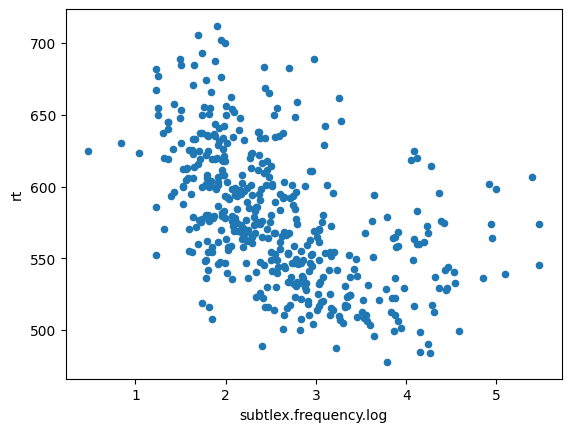

In [6]:
# Do stochastic random sampling using subtlex.frequency as the probability
# pandas dataframe.sample has what we need
# n = the number of words you want to sample
# random_state = the seed for the random number generator
# probabilities are computed automatically, replacement is False by default

n=450
stimuli = blp_sub.sample(n=n, weights='subtlex.frequency', random_state=1)

# What we want to achieve is that the selection of words
# achieves a frequency effect in the tasks
# So, we plot the log 10 frequency against reaction time
# this should show that there is a frequency effect over the range of selected words (with an expected floor effect at ± 500 ms, because this is LDT data)
stimuli.plot.scatter(x='subtlex.frequency.log', y='rt')

In [7]:
stimuli = stimuli.sort_values(by = 'bnc.frequency', ascending = False)

In [8]:
import random

def split_elements(df):
    df_1 = pd.DataFrame(columns=df.columns)
    df_2 = pd.DataFrame(columns=df.columns)
    df_3 = pd.DataFrame(columns=df.columns)

    for i in range(0, len(df), 3):
        group = list(df.iloc[i:i+3].index)
        random.shuffle(group)

        df_1 = df_1.append(df.loc[group[0]], ignore_index=True)
        df_2 = df_2.append(df.loc[group[1]], ignore_index=True)
        df_3 = df_3.append(df.loc[group[2]], ignore_index=True)

    return df_1, df_2, df_3


In [9]:
LD, PDM, PRPC = split_elements(stimuli)
LD_words = LD['spelling'].tolist()
PDM_words = PDM['spelling'].tolist()
PRPC_words = PRPC['spelling'].tolist()

words_complete = [LD, PDM, PRPC]
words = [LD_words, PDM_words, PRPC_words]

C:\Users\stefa\AppData\Local\Temp\ipykernel_21124\4161663792.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df.loc[group[0]], ignore_index=True)
C:\Users\stefa\AppData\Local\Temp\ipykernel_21124\4161663792.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(df.loc[group[1]], ignore_index=True)
C:\Users\stefa\AppData\Local\Temp\ipykernel_21124\4161663792.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_3 = df_3.append(df.loc[group[2]], ignore_index=True)


['have', 'were', 'your', 'many', 'year', 'does', 'took', 'seen', 'week', 'held', 'ever', 'kind', 'else', 'food', 'town', 'king', 'girl', 'hair', 'hear', 'nice', 'rose', 'sale', 'sold', 'text', 'cars', 'lose', 'goal', 'grow', 'drew', 'sets', 'vast', 'lane', 'kids', 'song', 'bird', 'self', 'ward', 'sons', 'gulf', 'yard', 'hung', 'soul', 'vary', 'puts', 'flew', 'hero', 'gene', 'sing', 'guns', 'earn', 'sums', 'pond', 'disc', 'clay', 'cats', 'beef', 'pays', 'isle', 'soup', 'blew', 'lend', 'cave', 'lion', 'sang', 'tons', 'pigs', 'grid', 'lawn', 'grim', 'axis', 'fare', 'cape', 'fist', 'lung', 'cult', 'bury', 'peer', 'mini', 'bees', 'obey', 'noon', 'bred', 'lens', 'deed', 'limb', 'bald', 'peas', 'noun', 'pill', 'acre', 'mama', 'spat', 'nuns', 'heal', 'edit', 'icon', 'owls', 'lust', 'maze', 'slab', 'rift', 'bulb', 'lass', 'clan', 'swam', 'aura', 'vine', 'boar', 'weep', 'soda', 'tart', 'dove', 'font', 'mall', 'gore', 'bins', 'smug', 'aide', 'pore', 'joys', 'wasp', 'coma', 'lark', 'tact', 'soar',

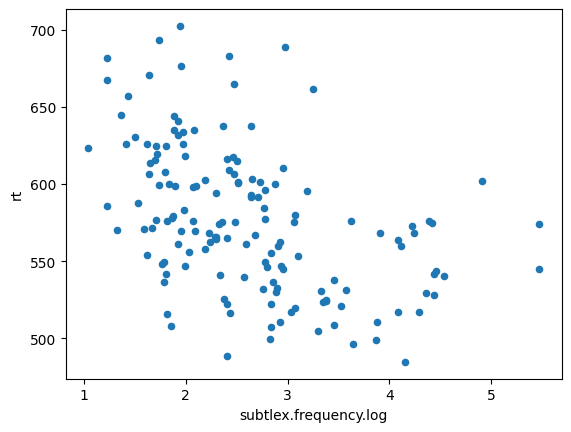

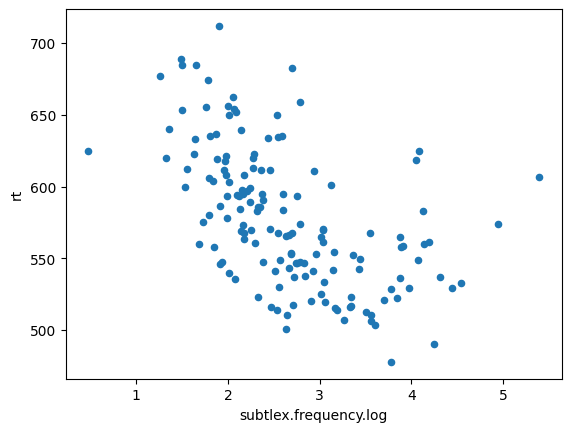

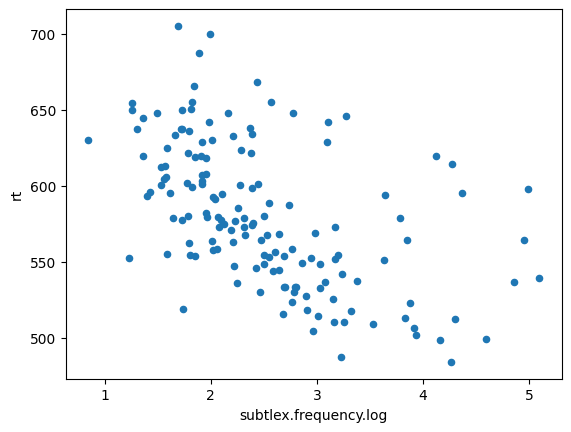

In [10]:
for w in words:
    print(w)

for c in words_complete:
    c.plot.scatter(x='subtlex.frequency.log', y='rt')

In [11]:

# make subsets, keeping tracks of how many words remain
blp_non = blp.copy()

# Select only words (lexicality ="N")
blp_non = blp_non[blp_non['lexicality'] == 'N']
print('Keep only non-words: Size of dataset: ', len(blp_non))

# Select only 4 letters long words (nletters=4)
blp_non = blp_non[blp_non['nletters'] == 4]
print('Keep only 4-letter non-words: Size of dataset: ', len(blp_non)) 

'''
Select only words known by at least 80% of the participants in the blp (accuracy>=90)
blp_non = blp_non[blp_non['accuracy'] <= 0.8]
blp_non = blp_non[blp_non['accuracy'] >= 0.5]
print('Keep only non-words known by x % of participants: Size of dataset: ', len(blp_non))
'''


Keep only non-words: Size of dataset:  27137
Keep only 4-letter non-words: Size of dataset:  1922


"\nSelect only words known by at least 80% of the participants in the blp (accuracy>=90)\nblp_non = blp_non[blp_non['accuracy'] <= 0.8]\nblp_non = blp_non[blp_non['accuracy'] >= 0.5]\nprint('Keep only non-words known by x % of participants: Size of dataset: ', len(blp_non))\n"

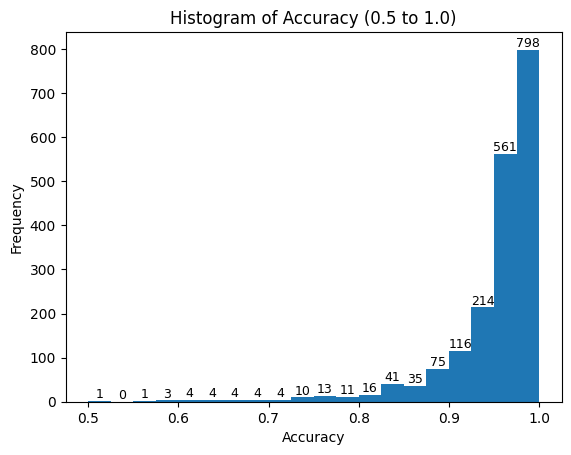

In [12]:
n, bins, patches = plt.hist(blp_non['accuracy'], bins=20, range=(0.5, 1.0))

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracy (0.5 to 1.0)')

# Annotate the plot with bin heights
for i in range(len(n)):
    plt.annotate(
        f"{int(n[i])}",
        xy=(bins[i] + (bins[i + 1] - bins[i]) / 2, n[i]),
        xycoords="data",
        va="bottom",
        ha="center",
        fontsize=9,
        color="black",
    )

# Show the plot
plt.show()

In [23]:
blp_non_filtered = blp_non[(blp_non['accuracy'] >= 0.5) & (blp_non['accuracy'] <= 0.9)]

# Define the weight function
def weight_func(x):
    if 0.5 <= x < 0.8:
        return 1
    
    elif 0.8 <= x < 0.9:
        return 0.1
    
    else:
        return 0

# Apply the weight function to the 'accuracy' column
weights = blp_non_filtered['accuracy'].apply(weight_func)

# Sample 150 values with the given weights
sampled_blp_non = blp_non_filtered.sample(n=150, weights=weights, random_state=1)

# Display the sampled DataFrame
print(sampled_blp_non['spelling'])

20125    gots
37485    reak
59       abow
18752    gabs
13167    donk
         ... 
27089    loar
3440     bips
28960    mewn
22711    hoft
36430    pupe
Name: spelling, Length: 150, dtype: object


In [24]:
blp_non_filtered_practice = blp_non[(blp_non['accuracy'] >= 0.91)]
sampled_blp_non_practice = blp_non_filtered.sample(n=20, random_state=1)
print(sampled_blp_non_practice['spelling'])

16127    feen
55785    zeel
50818    trag
32442    pacs
19173    gawl
50117    tipe
14307    dyre
52891    velt
36351    pumb
949      anom
54368    whem
38199    rens
23596    iche
36430    pupe
26042    lasp
17378    fobe
36505    purs
13664    dred
5902     buse
16603    firt
Name: spelling, dtype: object


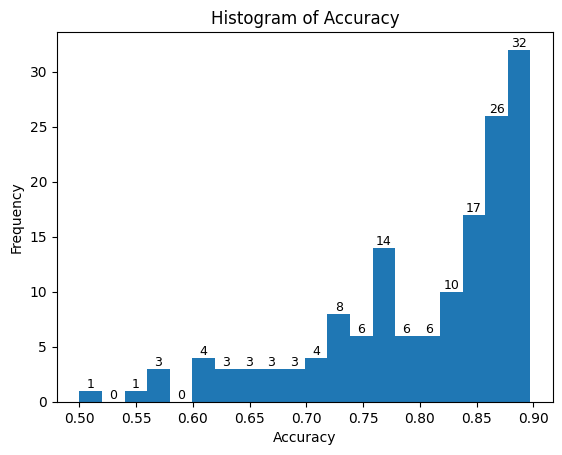

In [60]:
n, bins, patches = plt.hist(sampled_blp_non['accuracy'], bins=20)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracy')

# Annotate the plot with bin heights
for i in range(len(n)):
    plt.annotate(
        f"{int(n[i])}",
        xy=(bins[i] + (bins[i + 1] - bins[i]) / 2, n[i]),
        xycoords="data",
        va="bottom",
        ha="center",
        fontsize=9,
        color="black",
    )

# Show the plot
plt.show()

In [13]:
def save_column_to_text_file(df, column_name, dataframe_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Create a text file with the column name and dataframe_name as its file name
    file_name = f"{dataframe_name}_{column_name}.txt"
    with open(file_name, "w") as file:
        for value in df[column_name]:
            # Write each value to the file, one per line
            file.write(str(value) + '\n')

    print(f"Column '{column_name}' saved to {file_name}")

In [68]:
save_column_to_text_file(sampled_blp_non, 'spelling', 'sampled_blp_non')
save_column_to_text_file(sampled_blp_non_practice, 'spelling', 'sampled_blp_non_practice')


Column 'spelling' saved to sampled_blp_non_spelling.txt
Column 'spelling' saved to sampled_blp_non_practice_spelling.txt


In [14]:
for i, n in zip([LD, PDM, PRPC], ['LD', 'PDM', 'PRPC']):
    save_column_to_text_file(i, 'spelling', f"{n}_blp_sampled")

Column 'spelling' saved to LD_blp_sampled_spelling.txt
Column 'spelling' saved to PDM_blp_sampled_spelling.txt
Column 'spelling' saved to PRPC_blp_sampled_spelling.txt


In [15]:
import pandas as pd

def exclude_rows(target_df, column, *dfs):
    # Combine all the DataFrames into one
    combined_df = pd.concat(dfs, axis=0, ignore_index=True)

    # Find unique values in the specified column of the combined DataFrame
    excluded_values = set(combined_df[column].unique())

    # Filter the target DataFrame to include only rows with column values not in excluded_values
    result_df = target_df[~target_df[column].isin(excluded_values)]

    return result_df


In [19]:
practice_words = exclude_rows(blp_sub, 'spelling', stimuli)
save_column_to_text_file(practice_words, 'spelling', 'practice_words_sampled')

Column 'spelling' saved to practice_words_sampled_spelling.txt


In [25]:
len(sampled_blp_non_practice)

20